# Load, Fuel Mix, and LMP Data

This notebook walk through how to use `gridstatus` to access to the data availabe on [OASIS](http://oasis.caiso.com/).

While we will be using CAISO in this example, most of this API will also work with all other ISOs.

In [1]:
import pandas as pd
import plotly.express as px

import gridstatus

In [2]:
caiso = gridstatus.CAISO()

## Historical Fuel Mix

In [3]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()
mix_df = caiso.get_fuel_mix(start, end=end, verbose=False)

100%|██████████| 1696/1696 [15:48<00:00,  1.79it/s]


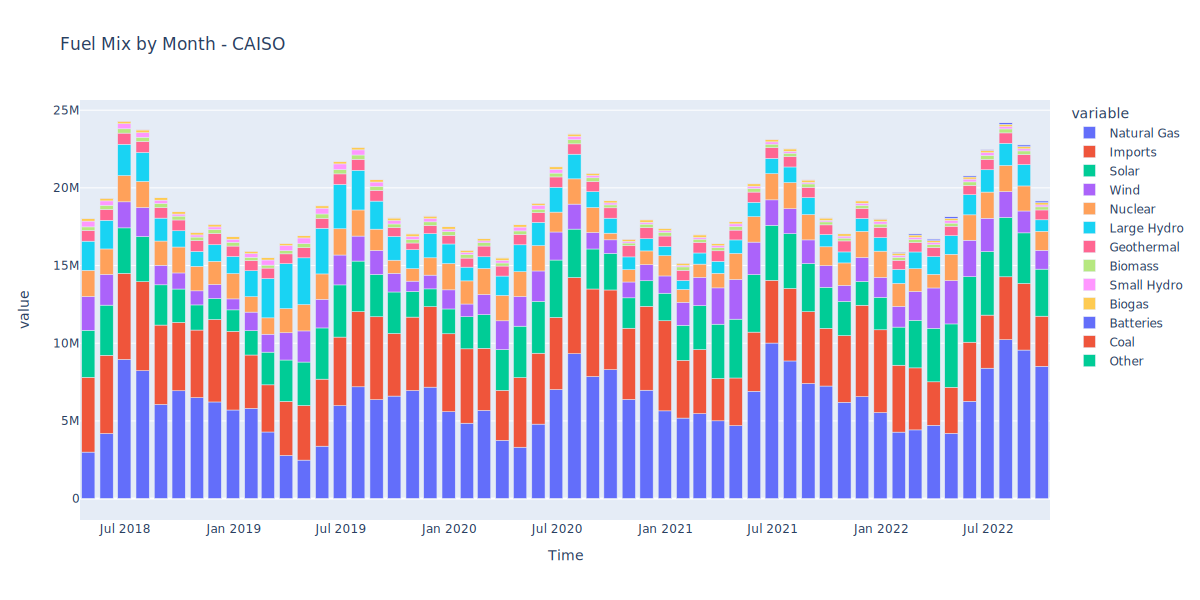

In [9]:
hourly_mix = mix_df.set_index("Time").resample("H").mean()
monthly_mix = hourly_mix.resample("MS").sum().reset_index()[1:-1]
top_sources = (
    monthly_mix[monthly_mix.columns[1:]]
    .sum()
    .sort_values(ascending=False)
    .index.tolist()
)
fig = px.bar(monthly_mix, x="Time", y=top_sources, title="Fuel Mix by Month - CAISO")
fig.show("svg", width=1200, height=600)

## Historical Load 

In [10]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()
load_df = caiso.get_load(start, end=end)

100%|██████████| 1696/1696 [13:27<00:00,  2.10it/s]


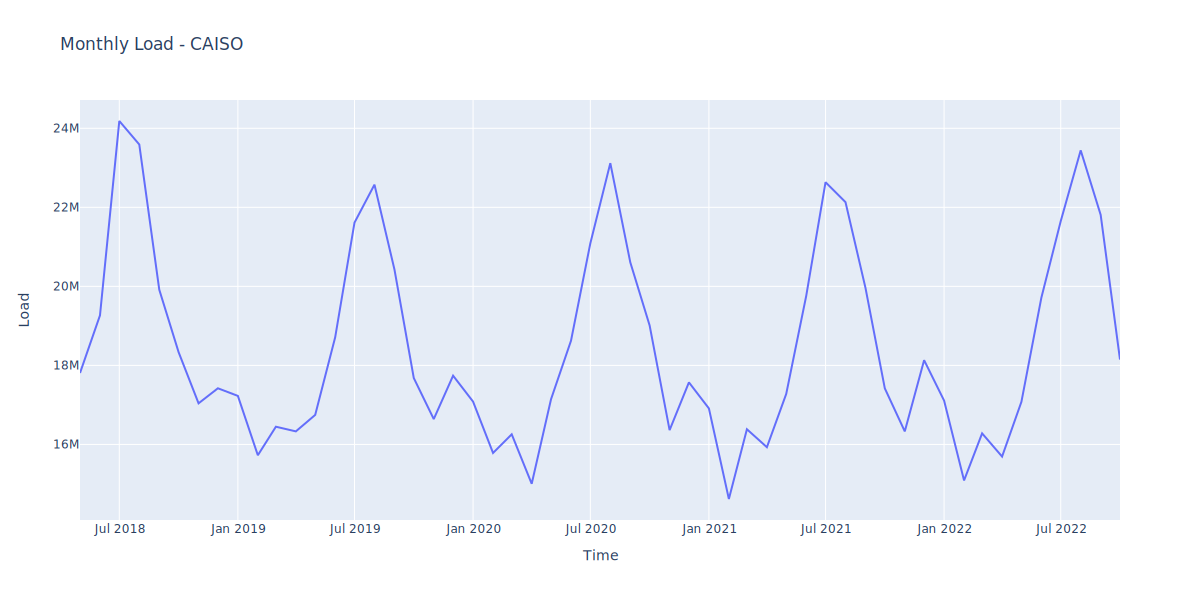

In [11]:
hourly_load = load_df.set_index("Time").resample("H").mean()
monthly_load = hourly_load.resample("MS").sum().reset_index()[1:-1]
fig = px.line(monthly_load, x="Time", y="Load", title="Monthly Load - CAISO")
fig.show("svg", width=1200, height=600)

## Historical Locational Marginal Pricing (LMP)

You can supply whatever nodes or market you'd like, but for now let's download data for 3 trading hubs in the Day Head Hourly Market. 

Note: CAISO only provides last 39 months of data.

In [12]:
start = pd.Timestamp("Jan 1, 2020").normalize()
end = pd.Timestamp.now().normalize()

locations = ["TH_NP15_GEN-APND", "TH_SP15_GEN-APND", "TH_ZP26_GEN-APND"]

lmp_df = caiso.get_lmp(
    start=start, end=end, market="DAY_AHEAD_HOURLY", locations=locations, sleep=5
)

100%|██████████| 35/35 [22:04<00:00, 37.85s/it]


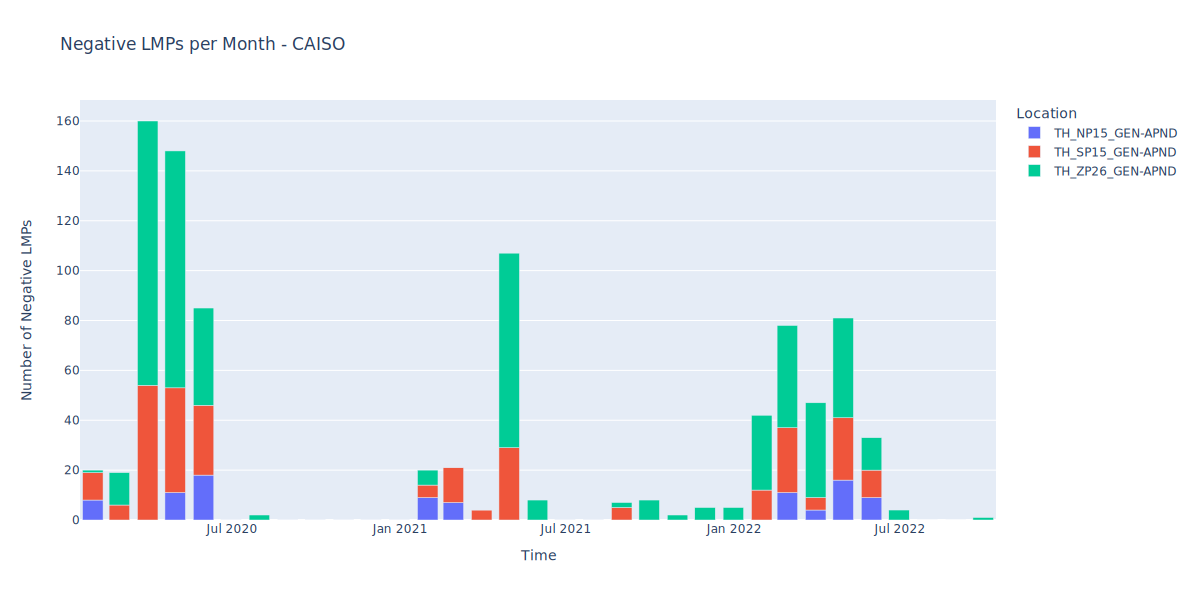

In [13]:
negative_lmps = lmp_df[lmp_df["LMP"] < 0].set_index("Time")
negative_per_month = (
    negative_lmps.groupby("Location").resample("MS")["LMP"].count().reset_index()
)
fig = px.bar(
    negative_per_month,
    x="Time",
    y="LMP",
    title="Negative LMPs per Month - CAISO",
    color="Location",
)
fig.update_yaxes(title="Number of Negative LMPs")
fig.show("svg", width=1200, height=600)

## Gas Prices

CAISO also publish information about gas prices and greenhouse gas allownces that we will download

In [14]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

gas_price_df = caiso.get_gas_prices(start=start, end=end, fuel_region_id="FRPGE2GHG")

100%|██████████| 11/11 [01:03<00:00,  5.78s/it]


In [15]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

ghg_df = caiso.get_ghg_allowance(start=start, end=end)

100%|██████████| 11/11 [01:03<00:00,  5.75s/it]
